## Dataset Description 


##### HighBP: Indicates whether the individual has been diagnosed with High Blood Pressure by a health professional.

##### HighChol: Indicates whether the individual has been diagnosed with High Blood Cholesterol by a health professional.

##### CholCheck: Reflects whether the person has undergone a cholesterol check within the last 5 years.

##### BMI: Body Mass Index, calculated by dividing the person's weight (in kilograms) by the square of their height (in meters).

##### Smoker: Indicates whether the person has a history of smoking, defined as having smoked at least 100 cigarettes.

##### Stroke: Indicates whether the person has a history of stroke.

##### Diabetes: Indicates the person's diabetes status, encompassing a history of diabetes, current pre-diabetes, or the presence of either type of diabetes.

##### PhysActivity: Indicates whether the person engages in some form of physical activity in their day-to-day routine.

##### Fruits: Indicates whether the person consumes 1 or more fruits daily.

##### Veggies: Indicates whether the person consumes 1 or more vegetables daily.

##### HvyAlcoholConsump: Indicates whether the person has a heavy alcohol consumption habit, defined as more than 14 drinks per week.

##### AnyHealthcare: Indicates whether the person has any form of health insurance.

##### NoDocbcCost: Indicates whether the person wanted to visit a doctor within the past year but couldn't due to cost constraints.

##### GenHlth: Reflects the person's self-reported general health on a scale ranging from 1 (excellent) to 5 (poor).

##### Menthlth: Indicates the number of days, within the past 30 days, that the person experienced bad mental health.

##### PhysHlth: Indicates the number of days, within the past 30 days, that the person experienced bad physical health.

##### DiffWalk: Indicates whether the person has difficulty walking or climbing stairs.

##### Sex: Indicates the gender of the person, where 0 represents female and 1 represents male.

##### Age: Indicates the age class of the person, with intervals starting from 1 for 18-24 years and ending at 13 for 80 years or older, each interval representing a 5-year increment.

##### Education: Indicates the highest year of school completed, ranging from 0 for never attended or kindergarten only to 6 for having attended 4 years of college or more.

##### Income: Indicates the total household income, ranging from 1 (at least $10,000) to 6 ($75,000+).

In [1]:
### importing the reqiered libraries 
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA as RandomizedPCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


## 1-Reading the dataset

In [2]:

file_path = 'heart_disease_health_indicators_BRFSS2015.csv'

# Read the CSV file into a DataFrame
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to inspect its structure
print(dataset.head())

   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  I

## 2-Preprocessing

#### - checking the null values 

In [3]:
# Check for null values in the dataset
null_values = dataset.isnull().sum()

# Display the count of null values for each column
print(null_values)

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


#### there is no null valeus

#### -Standard Scaling 

In [4]:
# Select only numerical colomns for scaling
columns_to_scale = ["MentHlth", "PhysHlth"]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the selected columns and transform them
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

In [5]:
dataset.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.998592,1.233999,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,-0.429630,-0.486592,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,3.617407,2.954590,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,-0.429630,-0.486592,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,-0.024926,-0.486592,0.0,0.0,11.0,5.0,4.0


### 3-Feature engineering 

#### convert BMI values into categories 

In [6]:
# Perform feature engineering on BMI to create a WeightStatus category
bins = [-float('inf'), 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obese']

# Replace the original 'BMI' values with the WeightStatus categories
dataset['BMI'] = pd.cut(dataset['BMI'], bins=bins, labels=labels)

In [7]:
dataset['BMI'].head()

0             Obese
1        Overweight
2        Overweight
3        Overweight
4    Healthy Weight
Name: BMI, dtype: category
Categories (4, object): ['Underweight' < 'Healthy Weight' < 'Overweight' < 'Obese']

#### encode the Categories into [1,2,3,4] with respect to ['Underweight', 'Healthy Weight', 'Overweight', 'Obese']

In [8]:

# Encode the new 'BMI' categories to numerical values
# Define a custom mapping for label encoding
label_mapping = {'Underweight': 1, 'Healthy Weight': 2, 'Overweight': 3, 'Obese': 4}

# Map the 'BMI' categories to specific numerical values using the custom mapping
dataset['BMI'] = dataset['BMI'].map(label_mapping)

In [9]:
dataset['BMI'].head(5)

0    4
1    3
2    3
3    3
4    2
Name: BMI, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

## 3- Creating a PCA-SVM Model

### -Without Hyperparameter Tuning

#### Creating and Evaluating a PCA-SVM Model for Heart Disease Prediction

In [10]:
# Separate features (X) and target variable (y)
X = dataset.drop(columns=['HeartDiseaseorAttack'])
y = dataset['HeartDiseaseorAttack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a PCA-SVM pipeline with PCA retaining 95% of the variance and an SVM classifier
pca_svm_model = Pipeline([
    ('pca', PCA(n_components=0.95)),  # Retain 95% of the variance
    ('svm', SVC(kernel='rbf'))    
])

# Train the PCA-SVM model on the training data
pca_svm_model.fit(X_train, y_train)

# Transform the original data using PCA
projected = pca_svm_model.named_steps['pca'].transform(X)


# Make predictions on the test set using the PCA-SVM model
y_pred_pca = pca_svm_model.predict(X_test)

# Evaluate the performance of the PCA-SVM model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy of PCA with SVM: {accuracy_pca}")

Accuracy of PCA with SVM: 0.9060430463576159


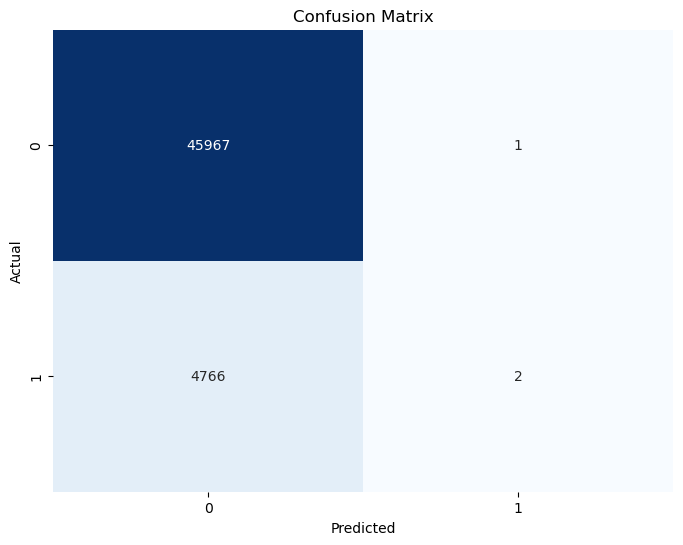

In [13]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_pca)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
class_report = classification_report(y_test, y_pred_pca)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     45968
         1.0       0.67      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.79      0.50      0.48     50736
weighted avg       0.88      0.91      0.86     50736



#### Conclusion: Minority Class Imbalance Identified

### -With Hyperparameter Tuning

In [25]:
X = dataset.drop(columns=['HeartDiseaseorAttack'])
y = dataset['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and Tuning the SVM Model with Grid Search
# Define a parameter grid for hyperparameter tuning

param_grid = {'svc__C': [1, 5, 10],
              'svc__gamma': [0.0005, 0.001, 0.005]}

# Apply Principal Component Analysis (PCA) for feature reduction
# Retain 95% of the variance, whiten the data, and set a random seed for reproducibility
pca = RandomizedPCA(n_components=0.95, whiten=True, random_state=42)
# Use balanced class weights to handle imbalanced datasets
svm = SVC(kernel='rbf', class_weight='balanced')

# Create a pipeline with PCA and SVM
model = make_pipeline(pca, svm)

# Set up a grid search for hyperparameter tuning
# Use cross-validation with 2 folds and print verbose information
grid = GridSearchCV(model, param_grid,cv=2, verbose=2)

# Measure the time it takes to perform grid search and model fitting
%time grid.fit(X_train, y_train)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time= 5.5min
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time= 5.6min
[CV] END .........................svc__C=1, svc__gamma=0.001; total time= 5.8min
[CV] END .........................svc__C=1, svc__gamma=0.001; total time= 5.7min
[CV] END .........................svc__C=1, svc__gamma=0.005; total time= 5.6min
[CV] END .........................svc__C=1, svc__gamma=0.005; total time= 5.9min
[CV] END ........................svc__C=5, svc__gamma=0.0005; total time= 5.5min
[CV] END ........................svc__C=5, svc__gamma=0.0005; total time= 5.5min
[CV] END .........................svc__C=5, svc__gamma=0.001; total time= 6.7min
[CV] END .........................svc__C=5, svc__gamma=0.001; total time= 9.0min
[CV] END .........................svc__C=5, svc__gamma=0.005; total time=11.0min
[CV] END .........................svc__C=5, svc__

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=0.95, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 10],
                         'svc__gamma': [0.0005, 0.001, 0.005]},
             verbose=2)

In [27]:
# Get the best parameters
best_params = grid.best_params_

print(best_params)

{'svc__C': 1, 'svc__gamma': 0.0005}


In [30]:
# Create the best model with the best parameters
# PCA-SVC Pipeline with the best parameters
final_pca_svm_model = make_pipeline(
    PCA(n_components=0.9),
    SVC(kernel='rbf', class_weight='balanced', C=1,gamma=0.0005)
)
# Fit the final model
final_pca_svm_model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=0.9)),
                ('svc', SVC(C=1, class_weight='balanced', gamma=0.0005))])

In [31]:
# Transform the original data using PCA
projected = final_pca_svm_model.named_steps['pca'].transform(X)

# Print dimensions before and after PCA
print(f"Original data shape: {X.shape}")
print(f"Transformed data shape (after PCA): {projected.shape}")
# Make predictions on the test set with PCA
y_pred_pca = final_pca_svm_model.predict(X_test)

# Evaluate the PCA-SVM model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy of PCA with SVM: {accuracy_pca}")

Original data shape: (253680, 21)
Transformed data shape (after PCA): (253680, 8)
Accuracy of PCA with SVM: 0.7061061179438662


## 4- Evaluating The model

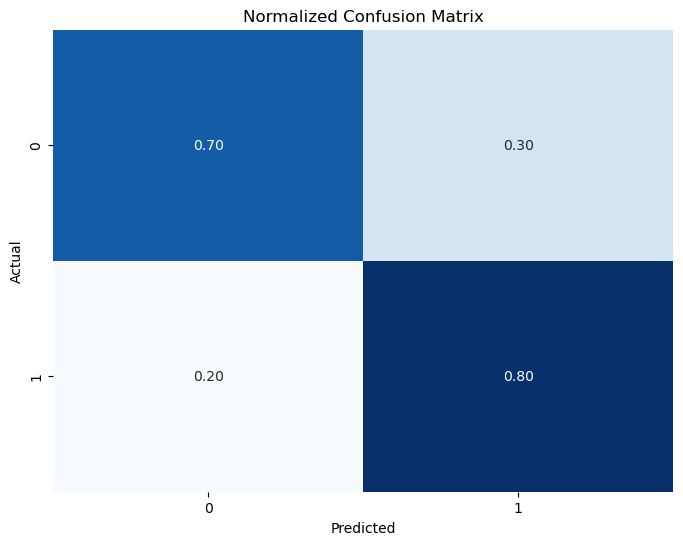

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_pca)

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
from sklearn.metrics import classification_report

# Assuming you have final_pca_svm_model as your trained model
y_pred = final_pca_svm_model.predict(X_test)

# Compute classification report
report = classification_report(y_test, y_pred_pca, target_names=['Class 0', 'Class 1'])

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.70      0.81     45968
     Class 1       0.21      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.71      0.77     50736



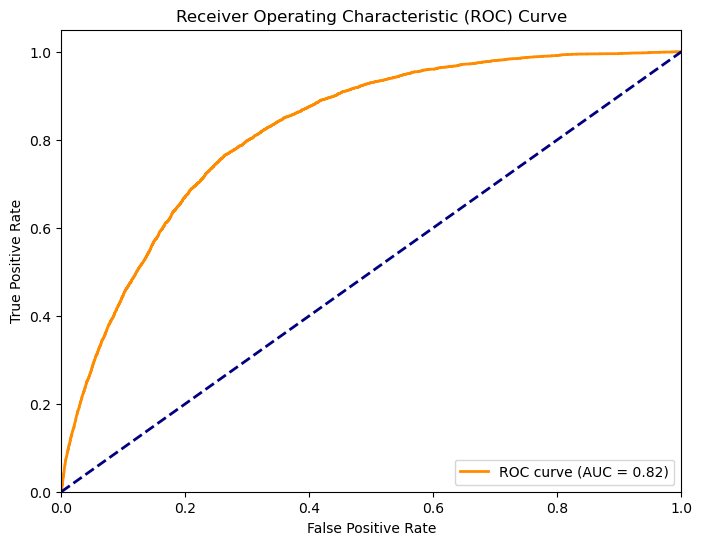

In [38]:
# Plot the ROC curve
from sklearn.metrics import roc_curve, auc
y_score = final_pca_svm_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()